In [1]:
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [2]:
a = torch.linspace(-1, 1, 10)
print(a)
print(a.shape)

tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])
torch.Size([10])


In [3]:
#size가 1인 dimension 추가
b = torch.unsqueeze(torch.linspace(-1, 1, 10), dim=1) # dim: 추가할 인덱스
print(b)
print(b.shape)

tensor([[-1.0000],
        [-0.7778],
        [-0.5556],
        [-0.3333],
        [-0.1111],
        [ 0.1111],
        [ 0.3333],
        [ 0.5556],
        [ 0.7778],
        [ 1.0000]])
torch.Size([10, 1])


In [4]:
#size가 1인 dimension 제거
print(b.shape)
print(torch.squeeze(b))
print(torch.squeeze(b).shape)

torch.Size([10, 1])
tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])
torch.Size([10])


torch.Size([100, 1])
torch.Size([100, 1])


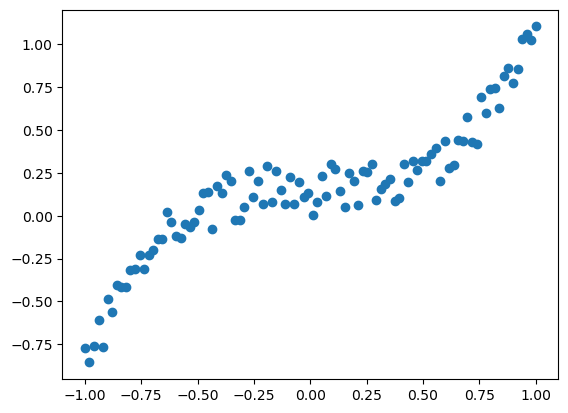

In [5]:
import random
from matplotlib import pyplot as plt
random.seed(1)
torch.manual_seed(1)
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)
y = X.pow(3) + 0.3 * torch.rand(X.size()).to(device)
print(X.shape)
print(y.shape)
plt.scatter(X.cpu().numpy(), y.cpu().numpy())

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from torch import nn
learning_rate = 1e-3
model = nn.Sequential(
    nn.Linear(1, 100),
    nn.Linear(100, 10),
    nn.Linear(10, 1)
)
model.to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for t in range(1000):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    print(f'epoch: {t}, loss: {loss:.3f}')
    
    optimizer.zero_grad()
    
    loss.backward()

    optimizer.step()

epoch: 0, loss: 0.159
epoch: 1, loss: 0.156
epoch: 2, loss: 0.152
epoch: 3, loss: 0.149
epoch: 4, loss: 0.145
epoch: 5, loss: 0.142
epoch: 6, loss: 0.139
epoch: 7, loss: 0.136
epoch: 8, loss: 0.133
epoch: 9, loss: 0.130
epoch: 10, loss: 0.128
epoch: 11, loss: 0.125
epoch: 12, loss: 0.122
epoch: 13, loss: 0.120
epoch: 14, loss: 0.118
epoch: 15, loss: 0.115
epoch: 16, loss: 0.113
epoch: 17, loss: 0.111
epoch: 18, loss: 0.109
epoch: 19, loss: 0.107
epoch: 20, loss: 0.105
epoch: 21, loss: 0.103
epoch: 22, loss: 0.101
epoch: 23, loss: 0.099
epoch: 24, loss: 0.098
epoch: 25, loss: 0.096
epoch: 26, loss: 0.094
epoch: 27, loss: 0.093
epoch: 28, loss: 0.091
epoch: 29, loss: 0.090
epoch: 30, loss: 0.088
epoch: 31, loss: 0.087
epoch: 32, loss: 0.086
epoch: 33, loss: 0.084
epoch: 34, loss: 0.083
epoch: 35, loss: 0.082
epoch: 36, loss: 0.081
epoch: 37, loss: 0.079
epoch: 38, loss: 0.078
epoch: 39, loss: 0.077
epoch: 40, loss: 0.076
epoch: 41, loss: 0.075
epoch: 42, loss: 0.074
epoch: 43, loss: 0.07

In [18]:
learning_rate = 1e-3
n_networks = 9
models = list()
criterion = torch.nn.MSELoss()
for i in range(n_networks):
    model = nn.Sequential(
        nn.Linear(1, 100),
        nn.ReLU() if i % 3 == 0 else nn.Tanh() if i % 3==1 else nn.Sigmoid(),
        nn.Linear(100, 1)
    )
    model.to(device)

    models.append(model)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for t in range(1000):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        print(f"model: {i + 1}, epoch: {t}, loss: {loss.item():.3f}")
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()

model: 1, epoch: 0, loss: 0.353
model: 1, epoch: 1, loss: 0.327
model: 1, epoch: 2, loss: 0.302
model: 1, epoch: 3, loss: 0.279
model: 1, epoch: 4, loss: 0.257
model: 1, epoch: 5, loss: 0.237
model: 1, epoch: 6, loss: 0.218
model: 1, epoch: 7, loss: 0.200
model: 1, epoch: 8, loss: 0.184
model: 1, epoch: 9, loss: 0.170
model: 1, epoch: 10, loss: 0.156
model: 1, epoch: 11, loss: 0.144
model: 1, epoch: 12, loss: 0.133
model: 1, epoch: 13, loss: 0.122
model: 1, epoch: 14, loss: 0.113
model: 1, epoch: 15, loss: 0.105
model: 1, epoch: 16, loss: 0.097
model: 1, epoch: 17, loss: 0.091
model: 1, epoch: 18, loss: 0.084
model: 1, epoch: 19, loss: 0.079
model: 1, epoch: 20, loss: 0.074
model: 1, epoch: 21, loss: 0.069
model: 1, epoch: 22, loss: 0.065
model: 1, epoch: 23, loss: 0.061
model: 1, epoch: 24, loss: 0.057
model: 1, epoch: 25, loss: 0.054
model: 1, epoch: 26, loss: 0.051
model: 1, epoch: 27, loss: 0.048
model: 1, epoch: 28, loss: 0.045
model: 1, epoch: 29, loss: 0.043
model: 1, epoch: 30,

In [19]:
from torch.autograd import Variable
acc=[]
for model in models:
    X_test, y_test = Variable(X_test), Variable(y_test)
    mse = ((torch.pow((model(X_test).data.cpu() - y_test.cpu()), 2)).sum()) / len(y_test.cpu())
    acc.append(mse)
    print(mse)

tensor(0.0065)
tensor(0.0115)
tensor(0.0359)
tensor(0.0065)
tensor(0.0066)
tensor(0.0357)
tensor(0.0068)
tensor(0.0076)
tensor(0.0358)


In [20]:
import numpy as np
model = models[np.argmin(acc)]
print(model)
print(np.argmin(acc))
print(acc[np.argmin(acc)])

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)
3
tensor(0.0065)


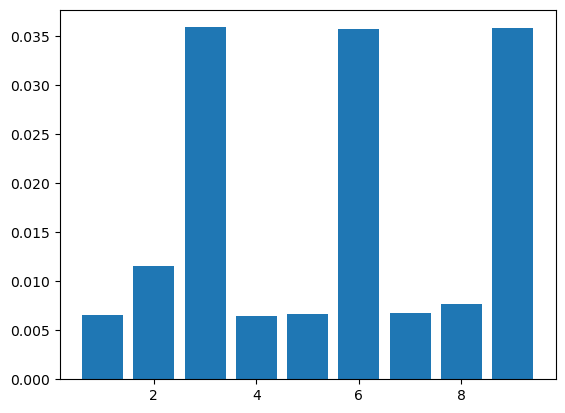

In [21]:
plt.bar(range(1, 10), acc)
plt.show()

In [22]:
from torchinfo import summary
summary(model, input_size=(32, 1))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 1]                   --
├─Linear: 1-1                            [32, 100]                 200
├─ReLU: 1-2                              [32, 100]                 --
├─Linear: 1-3                            [32, 1]                   101
Total params: 301
Trainable params: 301
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 0.00
Estimated Total Size (MB): 0.03

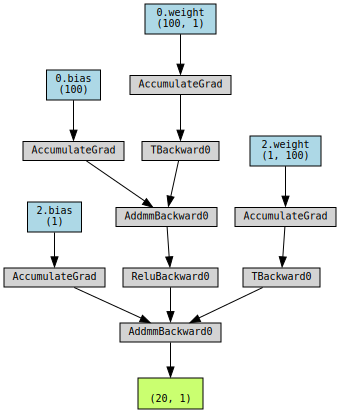

In [23]:
from torchviz import make_dot
pred = model(X_test)
make_dot(pred, params=dict(model.named_parameters()))


(dot.exe:14588): Pango-WARNING **: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


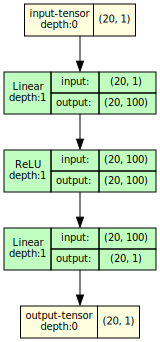

In [24]:
from torchview import draw_graph
model_graph = draw_graph(model, input_data=X_test)
model_graph.visual_graph

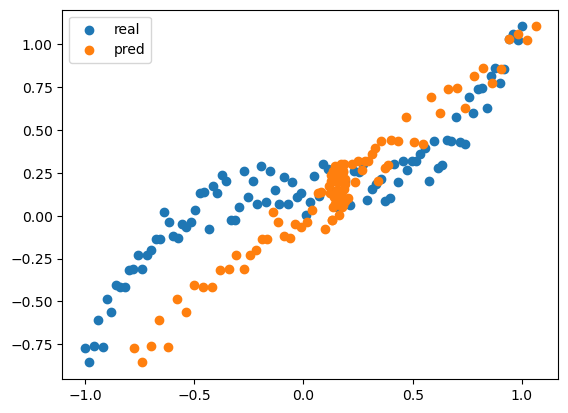

In [25]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='real')
plt.scatter(model(X).cpu().detach().numpy(), y.cpu().numpy(), label='pred')
plt.legend()
plt.show()